<a href="https://colab.research.google.com/github/cpd007/ML/blob/main/regression_seoul_bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [82]:
dataset_cols = ['bikecount', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']

In [83]:
df = pd.read_csv('/content/SeoulBikeData.csv').drop(['Date', 'Holiday', 'Seasons'], axis = 1)

In [84]:
df.columns = dataset_cols
df['functional'] = (df['functional'] == 'Yes').astype(int)
df = df[df['hour'] == 12]
df = df.drop('hour', axis = 1)

In [85]:
df.head()

,bikecount,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


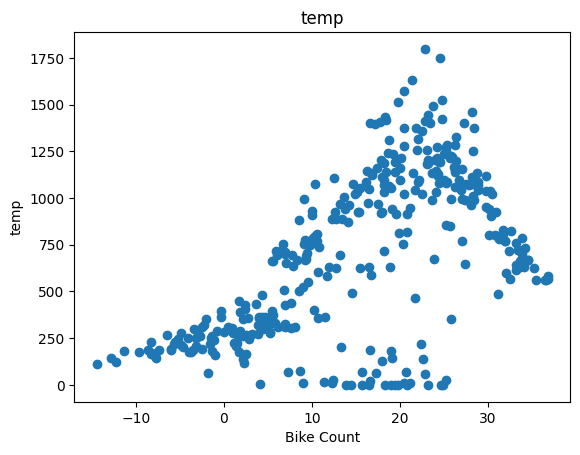

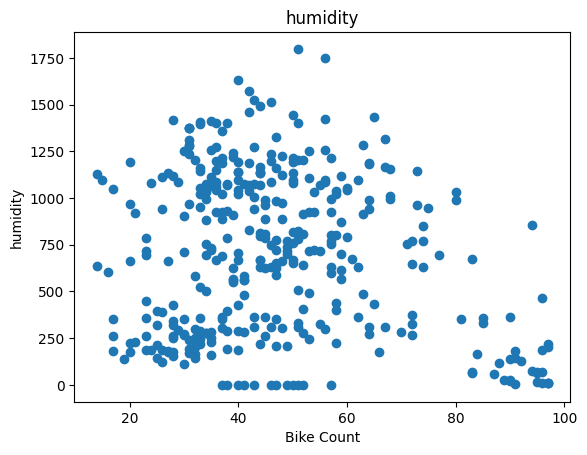

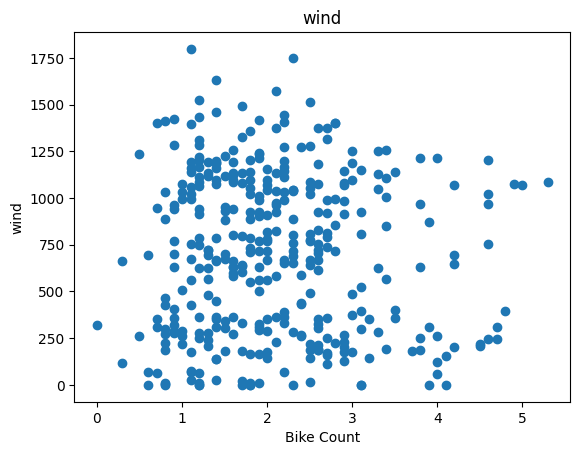

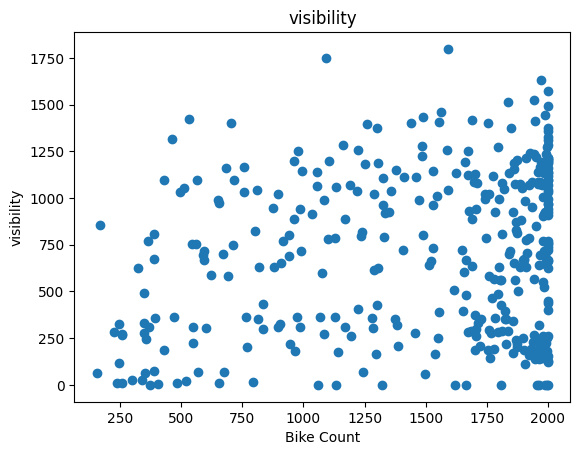

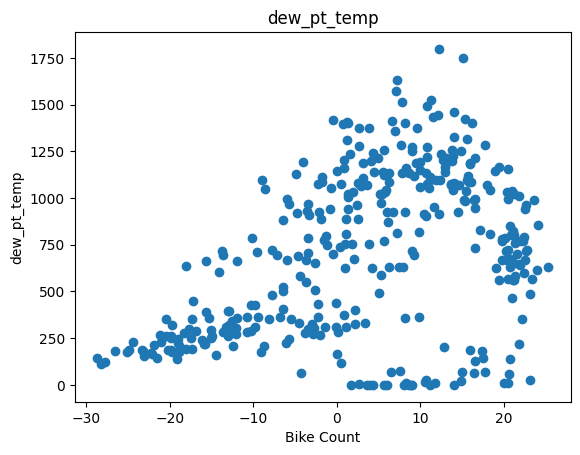

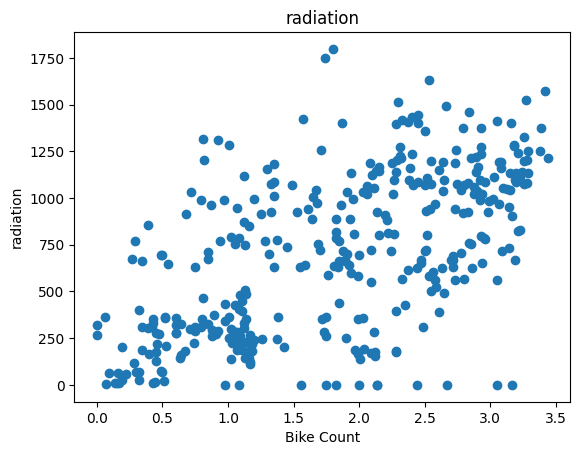

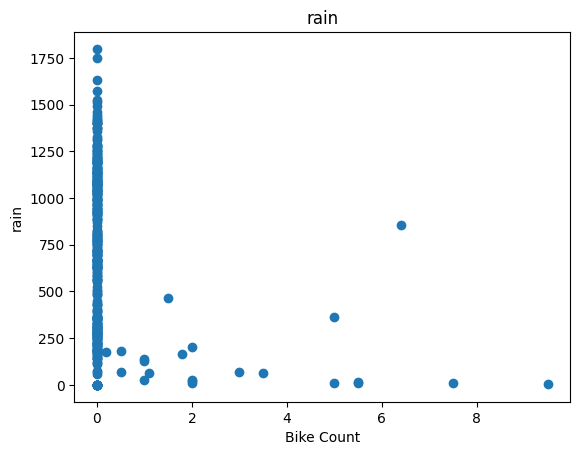

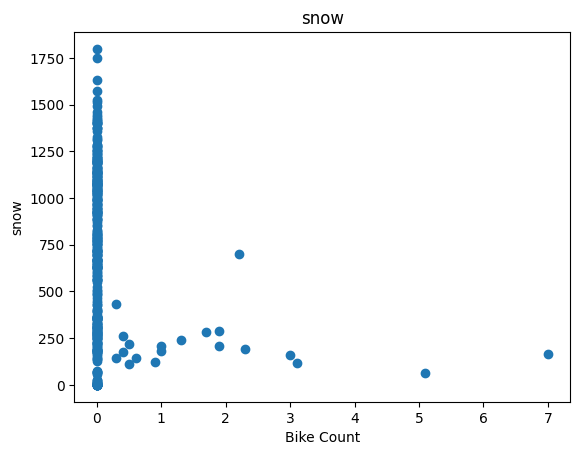

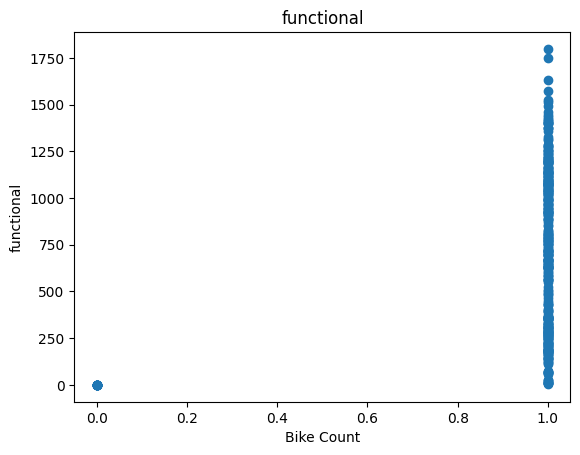

In [86]:
for label in df.columns[1:]:
  plt.scatter(df[label], df['bikecount'])
  plt.title(label)
  plt.xlabel('Bike Count')
  plt.ylabel(label)
  plt.show()

In [87]:
df = df.drop(['wind', 'visibility', 'functional'], axis = 1)

In [88]:
df.head()

,bikecount,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [89]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [90]:
def get_xy(dataframe, y_label, x_labels = None):
  dataframe  = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)

  data = np.hstack((X, y))
  return data,X, y


In [91]:
_, X_train_temp, y_train_temp = get_xy(train, 'bikecount', ['temp'])
_, X_valid_temp, y_valid_temp = get_xy(valid, 'bikecount', ['temp'])
_, X_test_temp, y_test_temp = get_xy(test, 'bikecount', ['temp'])

In [92]:
X_train_temp

array([[ -2.3],
       [ 13.9],
       [ 31.9],
       [ 28.1],
       [ 26.2],
       [ -6.5],
       [  3.9],
       [ 20.3],
       [ 18. ],
       [ 16.8],
       [ -3.9],
       [ 21.9],
       [ 22.9],
       [ 21.7],
       [ 22.1],
       [ 16.5],
       [ 11.4],
       [  5.9],
       [ 19.5],
       [  6.9],
       [  1.7],
       [ 31.9],
       [ 19.2],
       [  5.5],
       [ -8.3],
       [ 15.2],
       [ 22.5],
       [ 28.9],
       [  6.9],
       [ -8.3],
       [  6.9],
       [  6.9],
       [ 24.2],
       [  2.3],
       [ 32.6],
       [ 25.2],
       [  0.5],
       [ 19. ],
       [  8.6],
       [ 28.9],
       [ 21.5],
       [ 18.3],
       [ 24.8],
       [ 19.1],
       [ 10.4],
       [ -9.6],
       [ 27. ],
       [ 26.9],
       [ 18.2],
       [ 23.8],
       [ 24.7],
       [  6. ],
       [ 34.1],
       [  9.2],
       [  4.8],
       [ -7.8],
       [  0.9],
       [ 25.9],
       [ -8.6],
       [  0. ],
       [ 15.3],
       [ 30.2],
       [

In [93]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [94]:
temp_reg.score(X_train_temp, y_train_temp) #r2 score

0.305845239128993

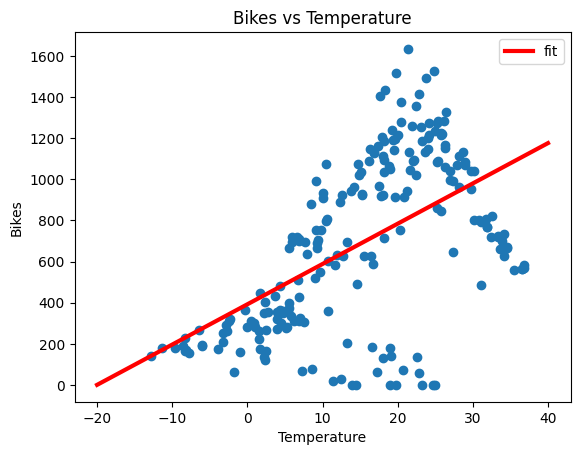

In [95]:
plt.scatter(X_train_temp, y_train_temp)
x = np.array(tf.linspace(-20, 40, 100)).reshape(-1, 1)
plt.plot(x, temp_reg.predict(x.reshape(-1, 1)), label='fit', color = 'red', linewidth=3)
plt.legend()
plt.title('Bikes vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Bikes')
plt.show()

#Multiple Regression

In [96]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, 'bikecount', df.columns[1:])
_, X_valid_all, y_valid_all = get_xy(valid, 'bikecount', df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, 'bikecount', df.columns[1:])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [97]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [98]:
all_reg.score(X_test_all, y_test_all)

0.4622931338367121

#Regresion with Neural Network

In [99]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [100]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1,))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [101]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(units=1)
])

temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                      loss=tf.keras.losses.MeanSquaredError())

In [102]:
history = temp_nn_model.fit(
    X_train_temp, y_train_temp,
    epochs=1000,
    # suppress logging
    verbose=0,
    validation_data=(X_valid_temp, y_valid_temp)
)

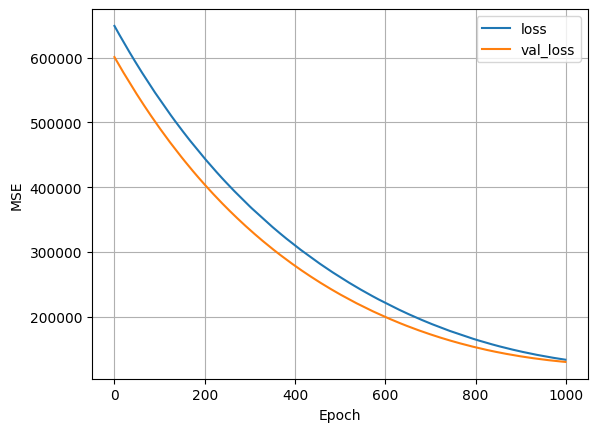

In [103]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


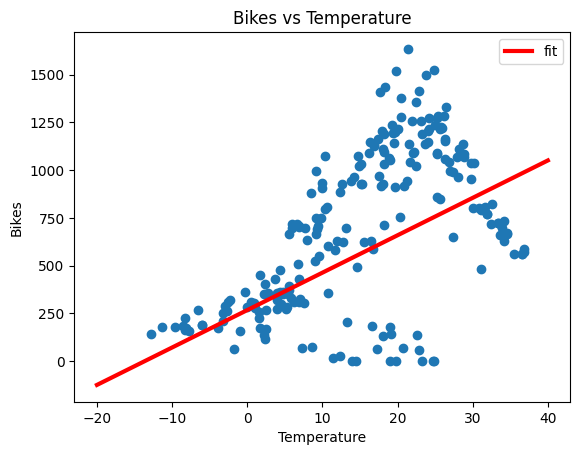

In [104]:
plt.scatter(X_train_temp, y_train_temp)
x = np.array(tf.linspace(-20, 40, 100)).reshape(-1, 1)
plt.plot(x, temp_nn_model.predict(x.reshape(-1, 1)), label='fit', color = 'red', linewidth=3)
plt.legend()
plt.title('Bikes vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Bikes')
plt.show()

#Regression using Neural Network

In [107]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [108]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss=tf.keras.losses.MeanSquaredError())

In [109]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    epochs=1000,
    # suppress logging
    verbose=0,
    validation_data=(X_valid_temp, y_valid_temp)
)

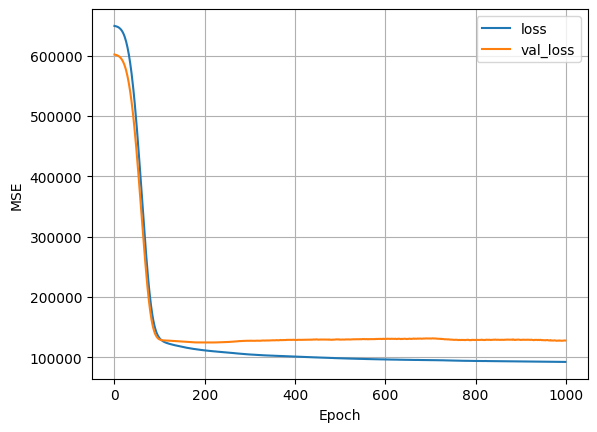

In [110]:
plot_loss(history)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


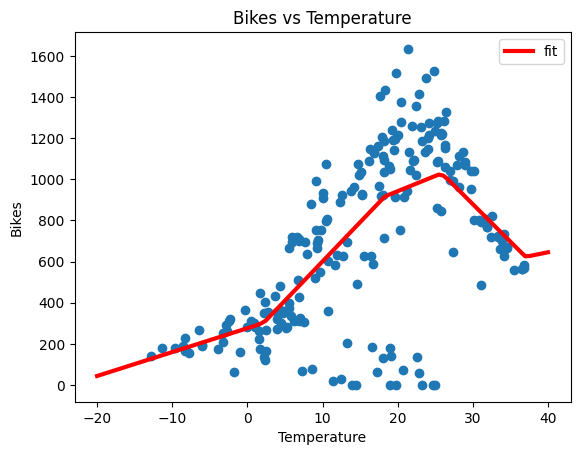

In [111]:
plt.scatter(X_train_temp, y_train_temp)
x = np.array(tf.linspace(-20, 40, 100)).reshape(-1, 1)
plt.plot(x, nn_model.predict(x.reshape(-1, 1)), label='fit', color = 'red', linewidth=3)
plt.legend()
plt.title('Bikes vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Bikes')
plt.show()

In [116]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [117]:
nn_model2 = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [118]:
nn_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss=tf.keras.losses.MeanSquaredError())

In [119]:
history = nn_model2.fit(
    X_train_all, y_train_all,
    epochs=100,
    # suppress logging
    verbose=0,
    validation_data=(X_valid_all, y_valid_all)
)

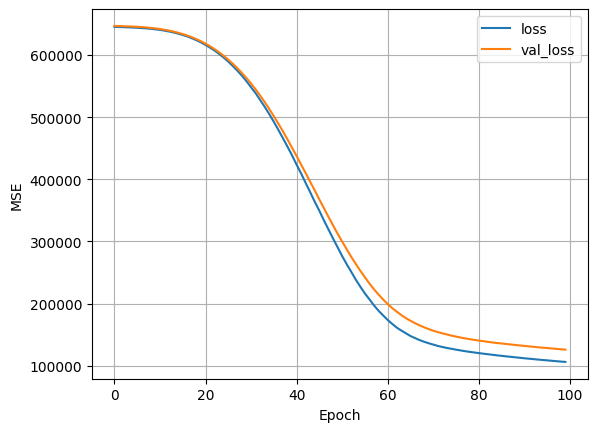

In [120]:
plot_loss(history)

In [123]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model2.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [122]:
def MSE(y_pred, y_test):
  return (np.square(y_pred - y_test)).mean()

In [124]:
MSE(y_pred_lr, y_test_all)

124588.04447993608

In [125]:
MSE(y_pred_nn, y_test_all)

141310.52832536068

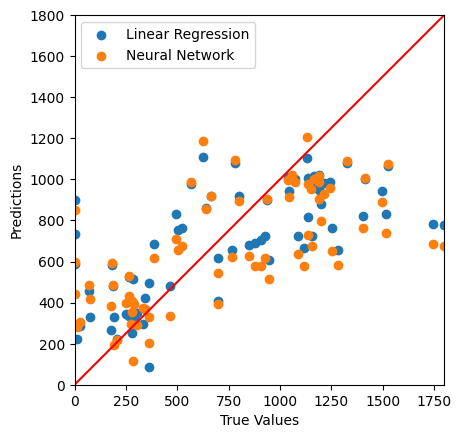

In [126]:
axs = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_lr, label='Linear Regression')
plt.scatter(y_test_all, y_pred_nn, label='Neural Network')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, c = 'red')